In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

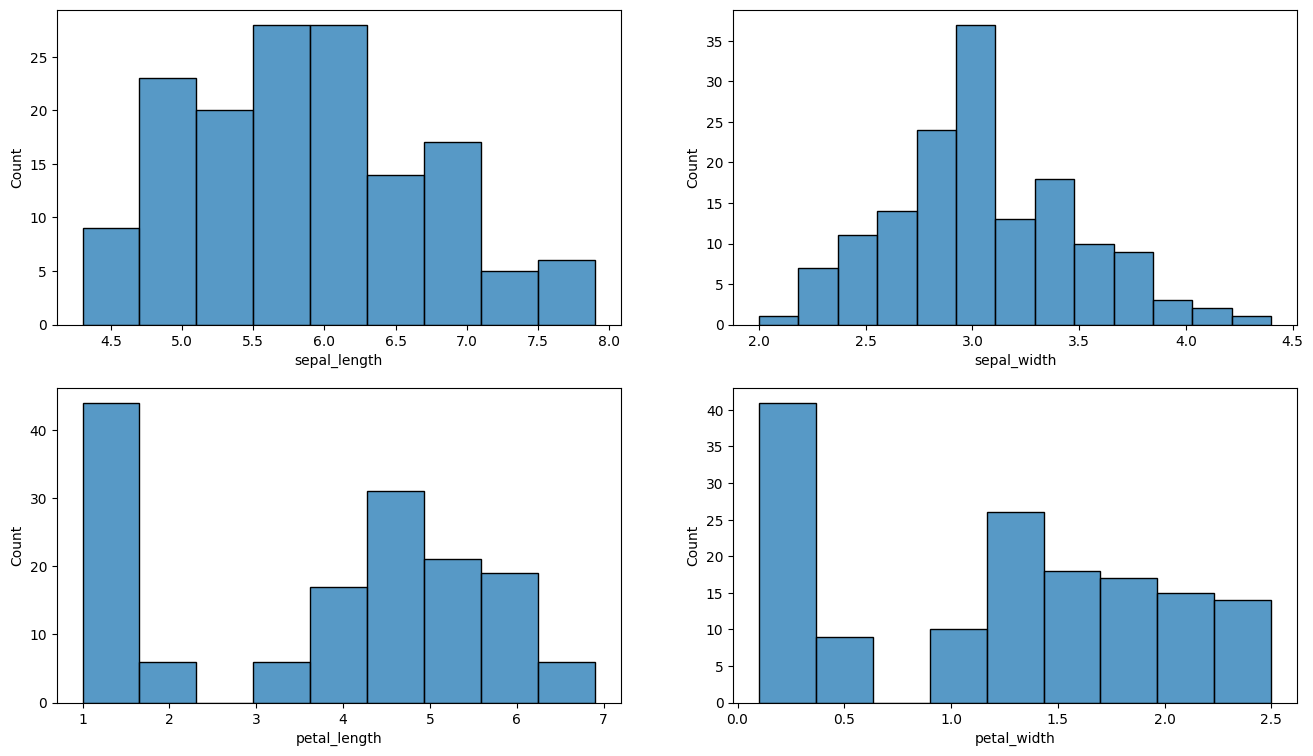

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (16, 9))
sns.histplot(df["sepal_length"], ax = axes[0, 0])
sns.histplot(df["sepal_width"], ax = axes[0, 1])
sns.histplot(df["petal_length"], ax = axes[1, 0])
sns.histplot(df["petal_width"], ax = axes[1, 1])
plt.show()

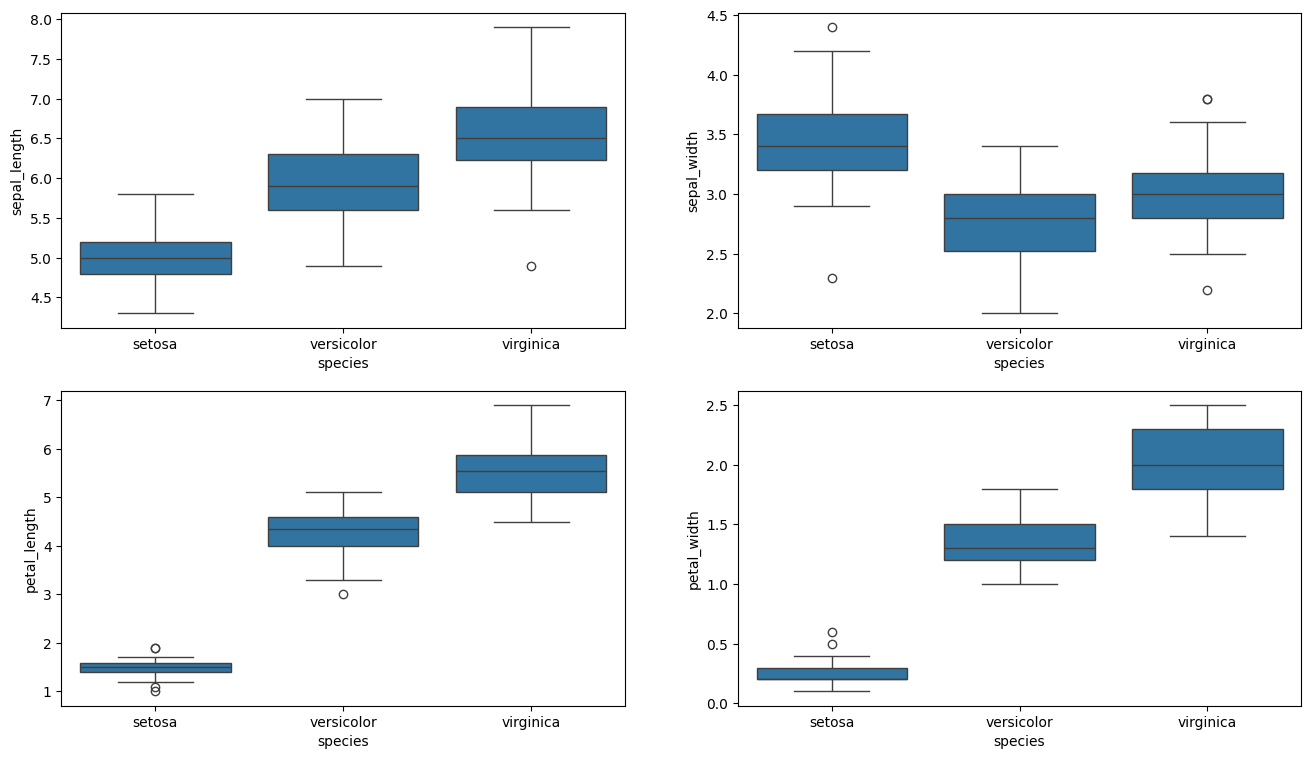

In [8]:
fig, axes = plt.subplots(2, 2, figsize = (16, 9))
sns.boxplot(y = "sepal_length", x = "species", data = df, ax = axes[0, 0])
sns.boxplot(y = "sepal_width", x = "species", data = df, ax = axes[0, 1])
sns.boxplot(y = "petal_length", x = "species", data = df, ax = axes[1, 0])
sns.boxplot(y = "petal_width", x = "species", data = df, ax = axes[1, 1])
plt.show()

In [16]:
for column in df.columns[:-1]:
    q1 = df[column].quantile(.25)
    q2 = df[column].quantile(.75)

    iqr = q2 - q1

    lb = q1 - 1.5 * iqr
    ub = q2 + 1.5 * iqr
    
    outlier = df[(df[column] < lb) | (df[column] > ub)][column]

    print(f"Feature name: {column}")
    print(f"Mean: {df[column].mean(): .2f}, Median: {df[column].median(): .2f}, Std dev: {df[column].std(): .2f}")
    print(f"Outliers: {outlier.tolist() if not outlier.empty else "None"}")

Feature name: sepal_length
Mean:  5.84, Median:  5.80, Std dev:  0.83
Outliers: None
Feature name: sepal_width
Mean:  3.06, Median:  3.00, Std dev:  0.44
Outliers: [4.4, 4.1, 4.2, 2.0]
Feature name: petal_length
Mean:  3.76, Median:  4.35, Std dev:  1.77
Outliers: None
Feature name: petal_width
Mean:  1.20, Median:  1.30, Std dev:  0.76
Outliers: None


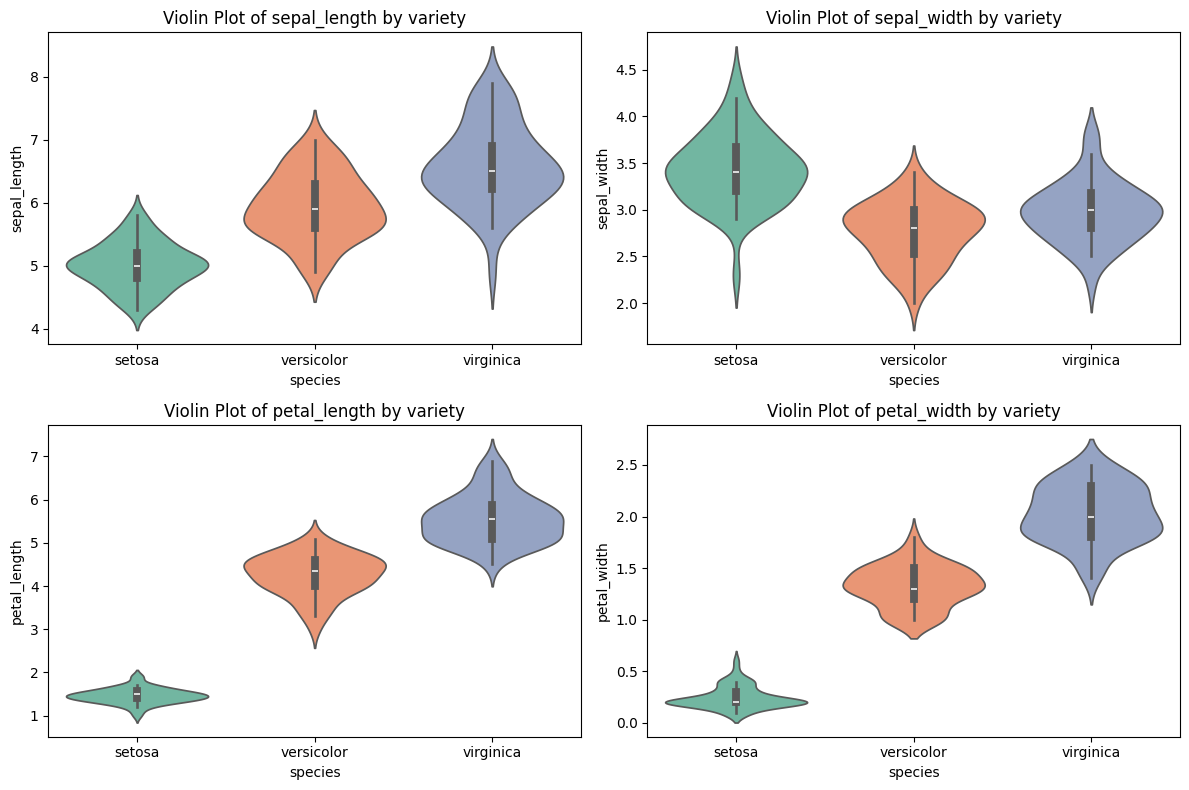

In [17]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df["species"], y=df[column], palette="Set2", hue=df['species'])
    plt.title(f"Violin Plot of {column} by variety")

plt.tight_layout()
plt.show()